## Sky Localizations of Gravitational-Wave Events
Tutorial 2.6.1: sky map visualization/comparison and cross-matching a galaxy catalog.

In this tutorial we will learn how:

1. to visualize and compare the sky localizations,

2. to cross-match a gravitational-wave sky localization with a galaxy catalog.

### For Google Colab Users.
Google Colab does not support third-party widgets and the interactive visualization is missed through the tutorial. We suggest running the tutorial in Binder or in your local environment.
Alternatively, you can access the interactive sky map by uncommenting the following lines. A HTML page with a JavaScript code is embedded.

In [1]:
#import IPython
    
#display(IPython.display.HTML('''
#    <!-- Aladin Lite CSS style file -->
#    <link rel="stylesheet" href="https://aladin.u-strasbg.fr/AladinLite/api/v2/latest/aladin.min.css" />

#    <!-- Aladin Lite has a dependency on the jQuery library -->
#    <script type="text/javascript" src="https://code.jquery.com/jquery-1.9.1.min.js" charset="utf-8"></script>

#    <!-- Aladin Lite container at requested dimensions -->
#    <div id="aladin-lite-div" style="width:500px;height:500px;"></div>

#    <!-- Aladin Lite JS code -->
#    <script type="text/javascript" src="https://aladin.u-strasbg.fr/AladinLite/api/v2/latest/aladin.min.js" charset="utf-8"></script>

#    <!-- Creation of Aladin Lite instance with initial parameters -->
#    <script type="text/javascript">
#        var aladin = A.aladin('#aladin-lite-div', {survey: "P/DSS2/color", fov:180, target: "16.91000 -28.1100",
#                                                   showFullscreenControl: false});
                                                   
#    <!-- Add 90% credible region of two-detector source localization.  -->                                              
#    var moc_1 = A.MOCFromURL('https://github.com/gw-odw/odw-2021/blob/tutorial_2_6/data/GW190814_with_2_IFO.fits?raw=true', 
#                          {name: 'GW190814_with_2_IFO', color: 'magenta', opacity: 0.7, adaptativeDisplay: false});
#    aladin.addMOC(moc_1);
    
#    <!-- Add 90% credible region of three-detector source localization.  -->                                              
#    var moc_2 = A.MOCFromURL('https://github.com/gw-odw/odw-2021/blob/tutorial_2_6/data/GW190814_with_3_IFO.fits?raw=true', 
#                          {name: 'GW190814_with_3_IFO', color: 'yellow', opacity: 0.7, adaptativeDisplay: false});
#    aladin.addMOC(moc_2);
    
#    <!-- Add 90% credible region of final sky localization.  -->                                              
#    var moc_3 = A.MOCFromURL('https://github.com/gw-odw/odw-2021/blob/tutorial_2_6/data/GW190814_final_localization.fits?raw=true', 
#                          {name: 'GW190814_final_localization', color: 'lightgreen', opacity: 0.85, adaptativeDisplay: false});
#    aladin.addMOC(moc_3);
    
#    <!-- Add the galaxy catalog in 90% credible volume. -->
#    aladin.addCatalog(A.catalogFromURL('https://github.com/gw-odw/odw-2021/blob/tutorial_2_6/data/galaxies_90volume_final_gw190814.vot?raw=true', 
#                                   {sourceSize:12, color: '#f08080', onClick: 'showTable'}));

#    </script>
#    '''))

In [2]:
# -- Uncomment following line if running in Google Colab
# !pip install -q 'ligo.skymap==0.5.2' 'mocpy==0.8.5' 'astroquery==0.4.1'

## Sky localizations and interferometer network.
Here we show the importance in constructing a network of interferometers for pinpointing the gravitational-wave source localizations over the sky. The case of GW190814 will be examined.

### Real time improving of the sky localizations of GW190814
GW190814 was first identified on 2019 August 14, 21:11:00 UTC as a loud two-detector event in LIGO Livingston and Virgo data (S/N 21.4 and 4.3). A [Notice](https://gcn.gsfc.nasa.gov/notices_l/S190814bv.lvc) was issued through NASA's Gamma-ray Coordinates Network 20 minutes later with a two-detector source localization computed using the rapid Bayesian algorithm BAYESTAR ([Singer & Price 2016](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.93.024013)).

Shortly thereafter, re-analyses including LIGO Hanford data were performed. A coincident gravitational-wave signal was identified in all three detectors. Results of these three-detector analyses were reported in the [GCN Circular 25324](https://gcn.gsfc.nasa.gov/gcn3/25324.gcn3) within 2.3 hr of the time of the event providing a three-detector localization. 

Finally, we shows the final sky localization as presented in 
[GW190814: Gravitational Waves from the Coalescence of a 23 Solar Mass Black Hole with a 2.6 Solar Mass Compact Object](https://iopscience.iop.org/article/10.3847/2041-8213/ab960f) which constrains the source to within $\sim$19 deg$^2$ at 90% probability.

We will apply the command line tool [`ligo_skymap_contour_moc`](https://lscsoft.docs.ligo.org/ligo.skymap/tool/ligo_skymap_contour_moc.html) from [`ligo.skymap`](https://lscsoft.docs.ligo.org/ligo.skymap/) to create the 90% credible region for each sky localization. 

In [3]:
# Download the two-detector sky map of GW190814 from GraceDB.
!curl -O https://gracedb.ligo.org/api/superevents/S190814bv/files/bayestar.multiorder.fits,0
    
# Define the 90% credible region of two-detector source localization.
!ligo-skymap-contour-moc bayestar.multiorder.fits,0  -c 90  --output 'GW190814_with_2_IFO'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  759k  100  759k    0     0   309k      0  0:00:02  0:00:02 --:--:--  309k
2021-05-13 16:58:28,722 INFO generated new fontManager


In [4]:
# Download the three-detector sky map of GW190814 from GraceDB.
!curl -O https://gracedb.ligo.org/api/superevents/S190814bv/files/bayestar.multiorder.fits
    
# Define the 90% credible region of three-detector source localization.
!ligo-skymap-contour-moc bayestar.multiorder.fits  -c 90  --output 'GW190814_with_3_IFO'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  759k  100  759k    0     0   382k      0  0:00:01  0:00:01 --:--:--  382k


In [5]:
# Download the final sky localization of GW190814 from GraceDB.
!curl -O https://gracedb.ligo.org/api/superevents/S190814bv/files/GW190814_PublicationSamples.multiorder.fits,0
    
# Define the 90% credible region of the final sky localization.
!ligo-skymap-contour-moc GW190814_PublicationSamples.multiorder.fits,0  -c 90  --output 'GW190814_final_localization'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  669k  100  669k    0     0   307k      0  0:00:02  0:00:02 --:--:--  307k


### For Google Colab Users.
Please, skip the following two cells. Google Colab does not support third-party widgets. You can interactively work with the data using the Aladin application embedded at the top of the page.

In [32]:
from ipyaladin import Aladin
from ipywidgets import Layout, Box, widgets

# Define two widgets.
left_widget = Aladin(layout=Layout(width='500px'), target='16.91000 -28.1100', fov=180)
right_widget = Aladin(layout=Layout(width='500px'), survey='P/DSS2')

# Synchronize target between two widgets.
widgets.jslink((left_widget, 'target'), (right_widget, 'target'))

# Synchronize FoV (zoom level) between widgets.
widgets.jslink((left_widget, 'fov'), (right_widget, 'fov'))

items = [left_widget, right_widget]

# Define layout.
box_layout = Layout(display='flex',
                    flex_flow='row',
                    align_items='stretch',
                    border='solid',
                    width='100%')
box = Box(children=items, layout=box_layout)
box

Box(children=(Aladin(fov=180.0, layout=Layout(width='500px'), options=['allow_full_zoomout', 'coo_frame', 'fov…

In [33]:
# Show the credible regions (90%) of the two/three-detector localizations in the right widget.
import ipyaladin as ipyal
colors = ["magenta", "yellow"]

credible_regions = ["GW190814_with_2_IFO", "GW190814_with_3_IFO"]

for credible_region, color in zip(credible_regions, colors):
    left_widget.add_moc_from_URL(credible_region, {'color': color, 'opacity': 0.7,
                                                   'adaptativeDisplay': False, 'name': credible_region})

# Show the credible region (90%) of the final sky map in the left widget.
right_widget.add_moc_from_URL('GW190814_final_localization', {'color': 'lightgreen', 'opacity': 0.8,
                                                              'adaptativeDisplay': False, 'name': 
                                                              'GW190814_final_localization'})

<a id='here'></a>
## Interactive Data Visualization


Scroll up and visualize the credible region contours in the interactive Aladin widgets. From the `Manage Layers` <img src="https://github.com/ggreco77/Tutotest/blob/main/images/ipyaladin_layer.png?raw=true" alt="the Layer Button" style="width:30px; display: inline-block;"/> the credible regions can be independently selected. 

If you hover the mouse pointer over a credible region plan a message will be displayed above it to show the coverage in sky percentage. How many square degrees? How refined the final localization is?

In [10]:
# Print areas in square degrees.
from mocpy import MOC

GW190814_with_2_IFO = MOC.from_fits('GW190814_with_2_IFO')
area_1 = GW190814_with_2_IFO.sky_fraction*41253
print('The sky area (90%) localized with two detectors is {:.2f} sq. deg.'.format(area_1))

GW190814_with_3_IFO = MOC.from_fits('GW190814_with_3_IFO')
area_2 = GW190814_with_3_IFO.sky_fraction*41253
print('The sky area (90%) localized with three detectors is {:.2f} sq. deg.'.format(area_2))

GW190814_final_localization = MOC.from_fits('GW190814_final_localization')
area_3 = GW190814_final_localization.sky_fraction*41253
print('The final sky area (90%) is {:.2f} sq. deg.'.format(area_3))

The sky area (90%) localized with two detectors is 771.81 sq. deg.
The sky area (90%) localized with three detectors is 37.60 sq. deg.
The final sky area (90%) is 18.84 sq. deg.


## Cross-Matching the sky localization with a Galaxy Catalog
All sky localization for CBC (Compact Binary Coalescence) events are three dimensional: they include both the sky probability map (as shown above) and a directionally dependent distance estimate. This can be useful for identifying possible host galaxies using a galaxy redshift catalog.

Using the [`crossmatch`](https://lscsoft.docs.ligo.org/ligo.skymap/postprocess/crossmatch.html) method in [`ligo.skymap`](https://lscsoft.docs.ligo.org/ligo.skymap/) package, we can extract the galaxies within the 90% credible volume. The galaxy table will be shown in the selected widget as a new overlay layer.

In [11]:
from astroquery.vizier import VizierClass
from astropy.coordinates import SkyCoord
from ligo.skymap.io import read_sky_map
from ligo.skymap.postprocess import crossmatch

Now we retrieve the [GLADE](https://vizier.u-strasbg.fr/viz-bin/VizieR?-source=VII/281) catalog.

**NOTE**. We will load a verified subsample from the GLADE catalog. This is because the process does not fit Binder’s default memory size.
For real applications, download the entire GLADE catalog.

In [12]:
# For a real application, uncomment the lines below to load the entire GLADE catalog.
#vizier = VizierClass(
#    row_limit=-1, columns=['GWGC', '_RAJ2000', '_DEJ2000', 'Dist'])
#cat, = vizier.get_catalogs('VII/281/glade2')

In [13]:
# Comment these lines in a real application. We just try to fit the Binder’s default memory size.
from astropy.table import Table
cat = Table.read('https://github.com/gw-odw/odw-2021/blob/tutorial_2_6/data/selected_table_4_binder_gw190814.fits?raw=true')

In [14]:
# Get coordinate and distance columns.
coordinates = SkyCoord(cat['_RAJ2000'], cat['_DEJ2000'], cat['Dist'])

In [20]:
# Read the final GW190814 sky map.
skymap = read_sky_map('GW190814_PublicationSamples.multiorder.fits,0', moc=True)

# List the galaxies within the 90% credible volume.
result = crossmatch(skymap, coordinates)
table = cat[result.searched_prob_vol < 0.9]

Next, we get the **dP_dV**; these values represent the probability per volume occupied by each galaxy.

In [22]:
keep = (result.searched_prob_vol < 0.9)
table = cat[keep]
table['dP-dV'] = result.probdensity_vol[keep].round(8)

Google Colab Users: please skip the following cell. You can interactively work with the galaxy catalog using the Aladin application embedded at the top of the page.

In [23]:
# Add the galaxy catalog in the Aladin (right) widget.
right_widget.add_table(table)

How many galaxies within the 90% credible volume? Suggestion: use the `Manage Layers`: <img src="https://github.com/ggreco77/Tutotest/blob/main/images/ipyaladin_layer.png?raw=true" alt="the Layer Button" style="width:30px; display: inline-block;"/>

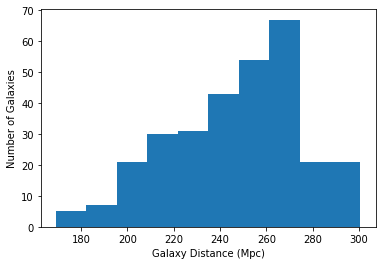

In [24]:
# Histogram of the galaxy distances within the 90% credible volume. 
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(table['Dist'])
plt.xlabel('Galaxy Distance (Mpc)')
plt.ylabel('Number of Galaxies')
plt.show()

## Challenge

GW170817 is an extraordinary example on how rapid and accurate sky localizations can help multi-messenger astronomy to identify the electromagnetic counterpart from a gravitational-wave event. GW170817 is the first observation of a binary neutron star inspiral. It was observed on August 17, 2017 at 12:41:04 UTC by the LIGO and Virgo detectors. 

In this challenge we will ask you:

- Download the sky localizations provided by the [two LIGO detectors](https://dcc.ligo.org/public/0146/G1701985/001/bayestar_no_virgo.fits.gz) and the final sky map in which the Virgo data have been added [LIGO and Virgo detectors](https://dcc.ligo.org/public/0157/P1800381/006/GW170817_skymap.fits.gz). Can you comment on which sky localization is more accurate?

- GW170817 occured in the galaxy NGC 4993, in the direction of the Hydra constellation. The host galaxy was identified thanks to the [electromagnetic counterpart of GW170817](https://dcc.ligo.org/LIGO-P1700294/public). Using the two-detector sky map, how many galaxies do you find in the 90% credible region? And if you consider the three-detector sky map?

- How many years ago GW170817 merged? To calculate the time of emission, you can use the following python code, where `redshift_GW170817` is the cosmological redshift of GW170817.

```
from astropy.cosmology import Planck15

time_merger = Planck15.lookback_time(redshift_GW170817)
print(time_merger)
```

- You can use the `Search Button` <img src="https://github.com/ggreco77/Tutotest/blob/main/images/ipyaladin_search.png?raw=true" alt="the Search Button" style="width:30px; display: inline-block;"/> to search for and visualize NGC 4993. 

### First point

In [34]:
# Download sky localizations
# Only LIGO detectors
!curl -O https://dcc.ligo.org/public/0146/G1701985/001/bayestar_no_virgo.fits.gz

!ligo-skymap-contour-moc bayestar_no_virgo.fits.gz  -c 90  --output "GW170817_with_2_IFO"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1592k  100 1592k    0     0   746k      0  0:00:02  0:00:02 --:--:--  746k


In [35]:
# Now with the Virgo data added
!curl -O https://dcc.ligo.org/public/0157/P1800381/006/GW170817_skymap.fits.gz
    
!ligo-skymap-contour-moc GW170817_skymap.fits.gz -c 90 --output "GW170817_with_3_IFO"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1453k  100 1453k    0     0   939k      0  0:00:01  0:00:01 --:--:--  938k


In [38]:
# Let's have a look at the two sky maps. On the right the one with only the LIGO detectors, on the left the one 
# with all the three detectors
left_widget = Aladin(layout=Layout(width='500px'), target='NGC 4993', fov=180)
right_widget = Aladin(layout=Layout(width='500px'), survey='P/DSS2')

widgets.jslink((left_widget, 'target'), (right_widget, 'target'))

widgets.jslink((left_widget, 'fov'), (right_widget, 'fov'))

items = [left_widget, right_widget]

box_layout = Layout(display='flex',
                    flex_flow='row',
                    align_items='stretch',
                    border='solid',
                    width='100%')
box = Box(children=items, layout=box_layout)
box

Box(children=(Aladin(fov=180.0, layout=Layout(width='500px'), options=['allow_full_zoomout', 'coo_frame', 'fov…

In [39]:
# Here we show the credible regions (90%)
colors = ["magenta", "yellow"]

credible_regions = ["GW170817_with_2_IFO", "GW170817_with_3_IFO"]

for credible_region, color, widget in zip(credible_regions, colors, items):
    widget.add_moc_from_URL(credible_region, {'color': color, 'opacity': 0.7,
                                                   'adaptativeDisplay': False, 'name': credible_region}) 

In [40]:
# Now become more quantitative and see how much the credible regions cover in sky percentage
# (which sky localization is more accurate?)
GW170817_with_2_IFO = MOC.from_fits('GW170817_with_2_IFO')
area_1 = GW170817_with_2_IFO.sky_fraction*41253
print('The sky area (90%) localized with two detectors is {:.2f} sq. deg.'.format(area_1))

GW170817_with_3_IFO = MOC.from_fits('GW170817_with_3_IFO')
area_2 = GW170817_with_3_IFO.sky_fraction*41253
print('The sky area (90%) localized with three detectors is {:.2f} sq. deg.'.format(area_2))

The sky area (90%) localized with two detectors is 187.47 sq. deg.
The sky area (90%) localized with three detectors is 16.16 sq. deg.


In [44]:
print("The more accurate sky localization is, of course, the one with the 3 detectors")

The more accurate sky localization is, of course, the one with the 3 detectors


### Second point

In [41]:
# Using the two-detector sky map let's see how many galaxies we find in the 90% credible region.

# We download the subsample of interest from the Glade catalogue, get coordinate and distance columns,
# finally read the final GW190814 sky map
cat = Table.read('https://github.com/gw-odw/odw-2021/blob/tutorial_2_6/data/selected_table_4_binder_gw170817.fits?raw=true')

coordinates = SkyCoord(cat['_RAJ2000'], cat['_DEJ2000'], cat['Dist'])

skymap_2ifo = read_sky_map('bayestar_no_virgo.fits.gz', moc=True)
skymap_3ifo = read_sky_map('GW170817_skymap.fits.gz', moc=True)

In [42]:
# Now list the galaxies within the 90% credible volume.
result_2ifo = crossmatch(skymap_2ifo, coordinates)
table_2ifo = cat[result_2ifo.searched_prob_vol < 0.9]

result_3ifo = crossmatch(skymap_3ifo, coordinates)
table_3ifo = cat[result_3ifo.searched_prob_vol < 0.9]

In [45]:
# Add the galaxy catalogs in the Aladin widgets
left_widget.add_table(table_2ifo)
right_widget.add_table(table_3ifo)

In [49]:
# How many galaxies do we find?
print("Using the two-detector sky map we find {} in the 90% credible region".format(len(table_2ifo)))
print("Using the three-detector sky map we find {} in the 90% credible region".format(len(table_3ifo)))

Using the two-detector sky map we find 162 in the 90% credible region
Using the three-detector sky map we find 21 in the 90% credible region


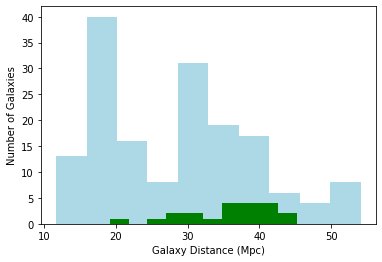

In [54]:
# For fun plot histograms of the galaxy distances within the 90% credible volume. 
plt.hist(table_2ifo['Dist'], color = "lightblue", alpha = 1)
plt.hist(table_3ifo['Dist'], color = "green", alpha = 1)
plt.xlabel('Galaxy Distance (Mpc)')
plt.ylabel('Number of Galaxies')
plt.show()

### Third point

In [56]:
# Now let's see how we can calculate how many years ago GW170817 merged
from astropy.cosmology import Planck15

redshift_GW170817 = 0.01   # This value is taken from this link: https://www.gw-openscience.org/eventapi/html/GWTC-1-confident/
                           # https://www.gw-openscience.org/eventapi/html/GWTC-1-confident/

time_merger = Planck15.lookback_time(redshift_GW170817)
print(time_merger)

0.1432949422189708 Gyr


### NOTE for Binder Users

In [25]:
# Download the following table to fit the Binder’s default memory size.
from astropy.table import Table
cat = Table.read('https://github.com/gw-odw/odw-2021/blob/tutorial_2_6/data/selected_table_4_binder_gw170817.fits?raw=true')